In [15]:
import os
import pandas as pd
from warnings import filterwarnings
filterwarnings('ignore')
import numpy as np
import matplotlib.pyplot as plt
import csv
from openpyxl import Workbook
from pandas import Series, DataFrame
from datetime import datetime
import seaborn as sns
from scipy import stats
from PIL import Image
from warnings import filterwarnings
filterwarnings('ignore')
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import nest_asyncio
nest_asyncio.apply()# Jupyter not defterinde eşzamanlı eylemleri etkinleştirmek için bir kez kullanıldı.


# SNScrape

En güçlü kazıma kütüphanelerinden birini projemizde kullanıyoruz.

In [16]:
import snscrape.modules.twitter as sntwitter
import pandas

# Creating list to append tweet data to
tweets_list2 = []

for i,tweet in enumerate(sntwitter.TwitterSearchScraper('yasakelma since:2022-10-18 until:2022-10-22').get_items()):
    if i>5000:
        break
    tweets_list2.append([tweet.content, tweet.date, tweet.user.username])
# Creating a dataframe from the tweets list above 
Tweets_df = pd.DataFrame(tweets_list2, columns=['tweet', 'date', 'username'])




In [17]:
Tweets_df

,tweet,date,username
0,@tugbaonbsii O köşk çok karışır 😂😂😂 abi de büy...,2022-10-21 23:29:40+00:00,zubeydeiscan
1,çok güzel💙💙\n#YasakElma https://t.co/zDYcmQ7q4G,2022-10-21 23:17:19+00:00,qll19i
2,@filmlerdendetay Bu diziye vasat demek 🤯🧠🔥 Sen...,2022-10-21 23:03:49+00:00,fenerbahce_T_
3,Gibi izlerken ağız şapırtısına takılmak mı… ya...,2022-10-21 22:49:23+00:00,aycakizilirmak
4,#YasakElma’nın Hilal’i #EceÖzdikici’den flaş a...,2022-10-21 22:41:37+00:00,stambulucom
...,...,...,...
1507,#YasakElma | Aunque en el episodio (151)emitid...,2022-10-18 00:32:12+00:00,AliYasinLatino
1508,ياقوة التفاح وعظمة القفله ..! رجع لنا تفاح الم...,2022-10-18 00:18:11+00:00,_kivo3
1509,#YasakElma\nالمشهد يجنن 🥹❤️❤️❤️\nhttps://t.co/...,2022-10-18 00:10:19+00:00,sarauxv
1510,"Official account RT’lemis, thank youuu 😍🙏🏻\n\n...",2022-10-18 00:09:40+00:00,TR_dizi_yorum


In [18]:
tweets_base=Tweets_df.filter(items=['tweet'])
df_Tweets = pd.DataFrame(tweets_base)
print(len(df_Tweets))

1512


### Tweetlerin Kirli Karakterlerden Temizlenmesi 

In [19]:
#noktalama işaretleri
df_Tweets["tweet"] = df_Tweets["tweet"].str.replace('[^\w\s]','')
# #sayılar
df_Tweets["tweet"]= df_Tweets["tweet"].str.replace('\d','')
tweets_base["tweet"]= tweets_base["tweet"].str.replace('(?:\@|http?\://|https?\://|www\S+)','')
df_Tweets["tweet"]= df_Tweets["tweet"].str.replace('@[A-Za-z0-9]+','')
df_Tweets["tweet"] =df_Tweets["tweet"].str.replace('http\S+','')

In [20]:
df_Tweets["tweet"]

0       tugbaonbsii O köşk çok karışır  abi de büyük a...
1                                   çok güzel\nYasakElma 
2       filmlerdendetay Bu diziye vasat demek  Sen Yas...
3       Gibi izlerken ağız şapırtısına takılmak mı yas...
4       YasakElmanın Hilali EceÖzdikiciden flaş açıkla...
                              ...                        
1507    YasakElma  Aunque en el episodio emitido hoy n...
1508    ياقوة التفاح وعظمة القفله  رجع لنا تفاح الموسم...
1509                            YasakElma\nالمشهد يجنن \n
1510    Official account RTlemis thank youuu \n\nYasak...
1511    Yasakelma_aa Belki de henuz gormedigimiz yeni ...
Name: tweet, Length: 1512, dtype: object

In [21]:
text = " ".join(review for review in df_Tweets.tweet)
print ("There are {} words in the combination of all review.".format(len(text)))

There are 144642 words in the combination of all review.


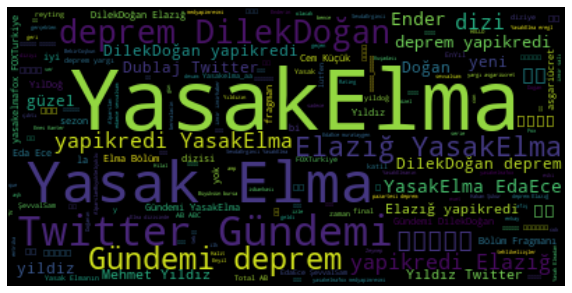

In [22]:
stopwords = set(STOPWORDS)
stopwords.update(["ben", "sen", "biz", "de", "ki", "ve", "da", "bir", "ile", "için", "bu", "ne", "gibi","amk", "a", "acaba", "altı", "altmış", "ama", "ancak", "arada", "artık", "asla", "aslında", "aslında", "ayrıca", "az", "bana", "bazen", "bazı", "bazıları", "belki", "ben", "benden", "beni", "benim", "beri", "beş", "bile", "bilhassa", "bin", "bir", "biraz", "birçoğu", "birçok", "biri", "birisi", "birkaç", "birşey", "biz", "bizden", "bize", "bizi", "bizim", "böyle", "böylece", "bu", "buna", "bunda", "bundan", "bunlar", "bunları", "bunların", "bunu", "bunun", "burada", "bütün", "çoğu", "çoğunu", "çok", "çünkü", "da", "daha", "dahi", "dan", "de", "defa", "değil", "diğer", "diğeri", "diğerleri", "diye", "doksan", "dokuz", "dolayı", "dolayısıyla", "dört", "e", "edecek", "eden", "ederek", "edilecek", "ediliyor", "edilmesi", "ediyor", "eğer", "elbette", "elli", "en", "etmesi", "etti", "ettiği", "ettiğini", "fakat", "falan", "filan", "gene", "gereği", "gerek", "gibi", "göre", "hala", "halde", "halen", "hangi", "hangisi", "hani", "hatta", "hem", "henüz", "hep", "hepsi", "her", "herhangi", "herkes", "herkese", "herkesi", "herkesin", "hiç", "hiçbir", "hiçbiri", "i", "ı", "için", "içinde", "iki", "ile", "ilgili", "ise", "işte", "itibaren", "itibariyle", "kaç", "kadar", "karşın", "kendi", "kendilerine", "kendine", "kendini", "kendisi", "kendisine", "kendisini", "kez", "ki", "kim", "kime", "kimi", "kimin", "kimisi", "kimse", "kırk", "madem", "mi", "mı", "milyar", "milyon", "mu", "mü", "nasıl", "ne", "neden", "nedenle", "nerde", "nerede", "nereye", "neyse", "niçin", "nin", "nın", "niye", "nun", "nün", "o", "öbür", "olan", "olarak", "oldu", "olduğu", "olduğunu", "olduklarını", "olmadı", "olmadığı", "olmak", "olması", "olmayan", "olmaz", "olsa", "olsun", "olup", "olur", "olur", "olursa", "oluyor", "on", "ön", "ona", "önce", "ondan", "onlar", "onlara", "onlardan", "onları", "onların", "onu", "onun", "orada", "öte", "ötürü", "otuz", "öyle", "oysa", "pek", "rağmen", "sana", "sanki", "sanki", "şayet", "şekilde", "sekiz", "seksen", "sen", "senden", "seni", "senin", "şey", "şeyden", "şeye", "şeyi", "şeyler", "şimdi", "siz", "siz", "sizden", "sizden", "size", "sizi", "sizi", "sizin", "sizin", "sonra", "şöyle", "şu", "şuna", "şunları", "şunu", "ta", "tabii", "tam", "tamam", "tamamen", "tarafından", "trilyon", "tüm", "tümü", "u", "ü", "üç", "un", "ün", "üzere", "var", "vardı", "ve", "veya", "ya", "yani", "yapacak", "yapılan", "yapılması", "yapıyor", "yapmak", "yaptı", "yaptığı", "yaptığını", "yaptıkları", "ye", "yedi", "yerine", "yetmiş", "yi", "yı", "yine", "yirmi", "yoksa", "yu", "yüz", "zaten", "zira", "zxtest"])

wordcloud = WordCloud(stopwords=stopwords, background_color="black").generate(text)
plt.figure(figsize=[10,10])
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")

plt.show()

### Duygu Analizi & Bert Modellerinin Yüklenmesi

In [23]:
from transformers import pipeline, AutoModelForTokenClassification, AutoTokenizer, AutoModelForSequenceClassification
tokenizer= AutoTokenizer.from_pretrained("savasy/bert-base-turkish-sentiment-cased")
model= AutoModelForSequenceClassification.from_pretrained("savasy/bert-base-turkish-sentiment-cased")

The cache for model files in Transformers v4.22.0 has been updated. Migrating your old cache. This is a one-time only operation. You can interrupt this and resume the migration later on by calling `transformers.utils.move_cache()`.


Moving 0 files to the new cache system


0it [00:00, ?it/s]


In [25]:
analyse = pipeline("sentiment-analysis", model=model, tokenizer=tokenizer)

In [26]:
analyse("Senden nefret ediyorum. ")

[{'label': 'negative', 'score': 0.9986574649810791}]

In [27]:
Tweet = list(df_Tweets['tweet'])
#Tweet

### Tweeetlere bakma, sonuçların ve scorun toplanması

In [36]:
code_to_label={
 'negative': 'negatif',
 'positive': 'pozitif',
    'notr': 'notr'
    
}

In [38]:
TweetSayisi=len(df_Tweets)
d= list()
k= list()
for i in range(TweetSayisi):
                    c= analyse(Tweet[i])
                    #a = c[0]['label']
                    a = code_to_label[c[0]['label']]
                    h =  c[0]['score']
                    #d =np.append(a)
                    d.append(a)
                    k.append(h)

In [39]:
d
df_Tweets["Tweets_duygu"]= pd.DataFrame(d)
df_Tweets["Tweets_duygu_score"]= pd.DataFrame(k)


In [40]:
df_Tweets

,tweet,Tweets_duygu_score,Tweets_duygu
0,tugbaonbsii O köşk çok karışır abi de büyük a...,0.996898,negatif
1,çok güzel\nYasakElma,0.994798,pozitif
2,filmlerdendetay Bu diziye vasat demek Sen Yas...,0.868316,negatif
3,Gibi izlerken ağız şapırtısına takılmak mı yas...,0.921692,pozitif
4,YasakElmanın Hilali EceÖzdikiciden flaş açıkla...,0.994282,negatif
...,...,...,...
1507,YasakElma Aunque en el episodio emitido hoy n...,0.961009,pozitif
1508,ياقوة التفاح وعظمة القفله رجع لنا تفاح الموسم...,0.928299,negatif
1509,YasakElma\nالمشهد يجنن \n,0.570463,negatif
1510,Official account RTlemis thank youuu \n\nYasak...,0.705118,negatif


# **Sonuç**

In [41]:
df_Tweets['Tweets_duygu'].value_counts()

negatif    1053
pozitif     459
Name: Tweets_duygu, dtype: int64

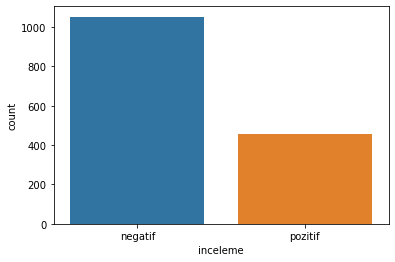

In [42]:
sns.countplot(df_Tweets.Tweets_duygu)
plt.xlabel('inceleme');

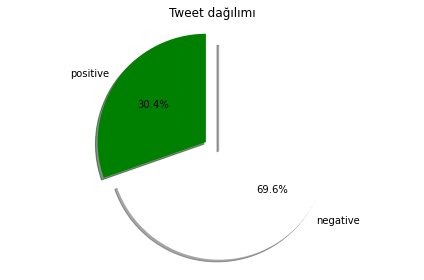

In [44]:

positive = (df_Tweets['Tweets_duygu'] == 'pozitif').sum()
negative = (df_Tweets['Tweets_duygu'] == 'negatif').sum()


proportions = [positive, negative]

plt.pie(
    proportions,
    labels = ['positive', 'negative'],
    shadow =0.9,
    colors = ['green','#ffffff'],
    explode = (0.15 , 0),
    startangle = 90,
    autopct = '%1.1f%%'
    )

plt.axis('equal')
plt.title("Tweet dağılımı")

plt.tight_layout()
plt.show()